<a href="https://colab.research.google.com/github/ShoukatKhattak/AI-Engineering/blob/main/EDA/MNIST_Digit_Recognition_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digit Classification with Artificial Neural Network (ANN)

In this project, we will build an Artificial Neural Network (ANN) to classify handwritten digits from the MNIST dataset. The MNIST dataset contains 70,000 images of handwritten digits (0-9) in grayscale, where each image is 28x28 pixels.

### Step 1: Setting Up the Project
### Install the required packages

First, we need to install TensorFlow and NumPy. TensorFlow is an open-source deep learning framework, and NumPy is a fundamental package for scientific computing in Python

In [ ]:
!pip install tensorflow
!pip install numpy

### Import the required libraries

We import the necessary libraries including TensorFlow, matplotlib for plotting, and NumPy for numerical operations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

### Load and Preprocess the Data

We load the MNIST dataset and preprocess it by normalizing the pixel values to the range [0, 1] and converting the labels to one-hot encoded vectors.

In [ ]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


- The training set contains 60,000 images. Each image is 28 pixels wide and 28 pixels high, resulting in a total of 784 pixels per image
- The test set contains 10,000 images. Each image is also 28x28 pixels.

In [ ]:
#28x28 matrix of the input
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
# Normalize the data to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Visualize the Data

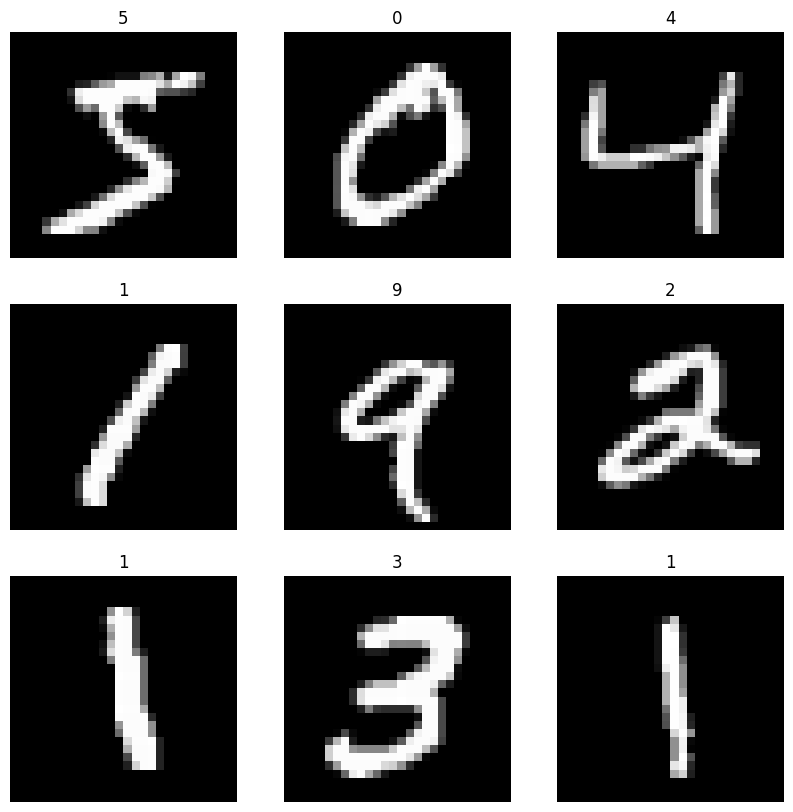

In [ ]:
# Display the first 9 images from the training set
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(np.argmax(y_train[i]))
    plt.axis('off')
plt.show()

### We visualize the first 9 images from the training set to get an idea of what the data looks like.

### Step 2: Build and Train the ANN


We define a Sequential model with a Flatten layer to flatten the 28x28 images into a 1D array, a Dense layer with 128 neurons and ReLU activation, and a Dense output layer with 10 neurons and softmax activation.

To flatten the data from 28x28 to make it 784 ( to make 2d to 1 d array)

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(256, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation (max(0,n))
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class) and softmax activation
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

1. **Input Flatten Layer**:
   - The input images are initially of size 28x28 pixels.
   - When flattened, each image becomes a 1D array of size 784 (28 * 28).

2. **Dense Layer 1 (Hidden Layer)**:
   - This layer has 128 neurons.
   - Each neuron is connected to every pixel in the flattened input (784 connections), and there's one bias term per neuron total equals to 1004480.
   
3. **Dense Layer 2 (Output Layer)**:
   - This layer has 10 neurons, one for each digit (0-9).
   - Each neuron is connected to every neuron in the previous layer (128 connections), and there's one bias term per neuron.
   

### Compile the Model


We compile the model using the Adam optimizer, categorical cross-entropy loss, and accuracy as a metric.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Train the Model
We train the model on the training data for 10 epochs, with 20% of the data used for validation.

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8702 - loss: 0.4566 - val_accuracy: 0.9569 - val_loss: 0.1421
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9676 - loss: 0.1062 - val_accuracy: 0.9696 - val_loss: 0.0994
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9805 - loss: 0.0642 - val_accuracy: 0.9713 - val_loss: 0.0894
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9862 - loss: 0.0418 - val_accuracy: 0.9759 - val_loss: 0.0872
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9901 - loss: 0.0312 - val_accuracy: 0.9737 - val_loss: 0.0953
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9923 - loss: 0.0240 - val_accuracy: 0.9705 - val_loss: 0.1103
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9930 - loss: 0.0203 - val_accuracy: 0.9747 - val_loss: 0.1044
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9938 - loss: 0.0173 - val_accuracy: 0

### Evaluate the Model
We evaluate the model on the test data to see how well it performs on unseen data.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9714 - loss: 0.1171
Test accuracy: 0.9764999747276306


### Plot Training History
We plot the training and validation accuracy to visualize the model's performance over the epochs.

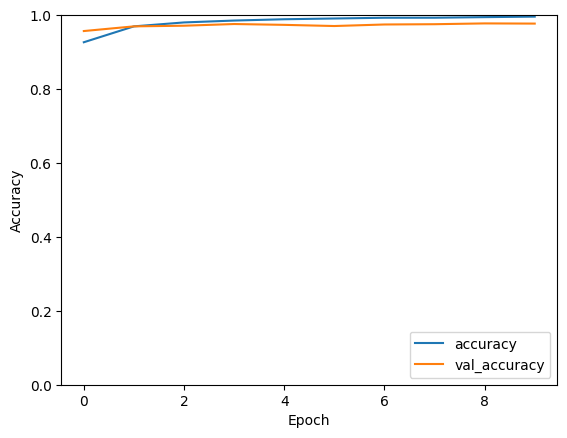

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


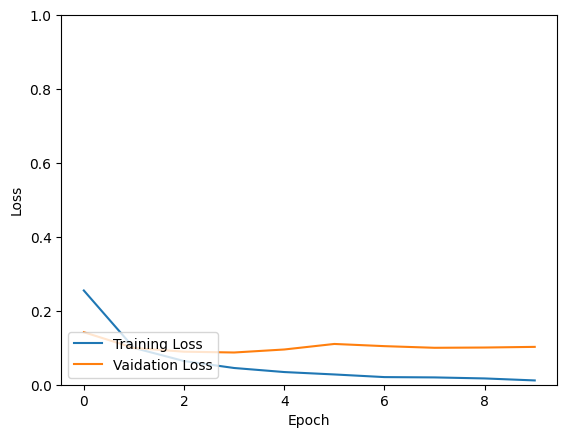

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Vaidation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower left')
plt.show()


### Step 3: Make Predictions

### Make Predictions
We use the trained model to make predictions on the test data and convert the predicted probabilities to class labels.

In [ ]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### Visualize Predictions
We visualize the first 9 predictions from the test set along with the images to see how well the model is performing.


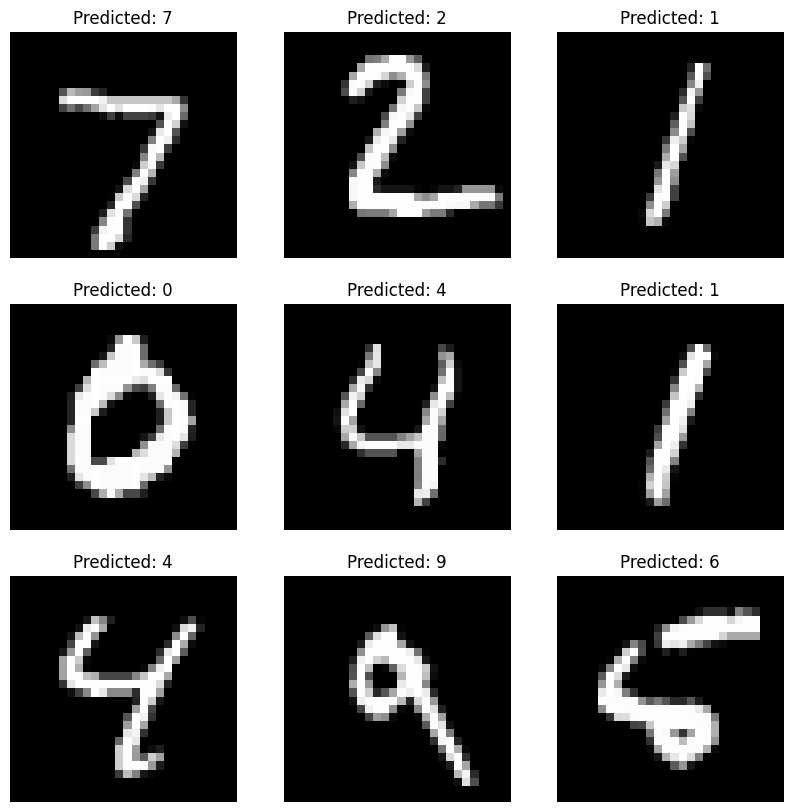

In [ ]:
# Display the first 9 predictions from the test set
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}")
    plt.axis('off')
plt.show()


## Conclusion
Our ANN model demonstrated strong performance in digit classification on the MNIST dataset, achieving a test accuracy of approximately 98%. This project highlights the effectiveness of neural networks in image classification tasks and serves as a valuable learning experience in implementing machine learning models for real-world applications.

Moving forward, we could explore further improvements to the model, such as experimenting with different architectures, hyperparameters, and optimization techniques to potentially achieve even higher accuracy. Additionally, we could apply transfer learning or explore more advanced neural network architectures to tackle more challenging datasets and tasks. Overall, this project lays a solid foundation for future endeavors in deep learning and computer vision.